# Part 1

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#the temporal context model assumes that the past becomes increasingly
#dissimilar to the future, so that memories become harder to retrieve the
#farther away in the past they are

In [2]:
N_WORLD_FEATURES = 5
N_ITEMS = 10
ENCODING_TIME = 500
TEST_TIME = 20

In [3]:
schedule =np.column_stack((np.sort(np.round(np.random.random(N_ITEMS)*500)),np.arange(N_ITEMS)))
schedule_load = ENCODING_TIME/np.median(np.diff(schedule[:,0]))
encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
schedule_load

9.803921568627452

In [4]:
world_m = np.array([1 ,2 ,1, 2, 3])          
world_var = 1
delta = 0.05                   
beta_param = 0.001      #context drift parameter, ct=beta*ct + c_t-1      
m = 0

In [5]:
def drawFromADist(p):
    if(np.sum(p)==0):
        p = 0.05*np.ones(len(p))
    p=p/np.sum(p)
    c=np.cumsum(p)
    idx=np.where((np.random.random(1)-np.cumsum(p))<0)
    sample=np.min(idx)
    out = np.zeros(len(p))
    out[sample] = 1
#     out[out==0] = 0.1
    return out

#### Simulation encoding

In [6]:
for time in range(ENCODING_TIME):
    world_m = world_m + delta
    #world_m = beta_param*world_m + delta    #not used  change past
    world = np.random.normal(world_m, world_var)
    sample=random.randint(0,1)
    delta=np.random.normal(world_m[sample], world_var)
    if(m<N_ITEMS):
        if(time==schedule[m,0]):
            encoding[m,0:5] =  world
            encoding[m,5]=m             #encoding world_context and item
            m =  m + 1

#### Simulating retrieval using SAM, but with a bijective image-item mapping

In [7]:
out=np.zeros(TEST_TIME)
while(time<ENCODING_TIME+TEST_TIME):
    world_m = world_m + delta
    #world_m = beta_param*world_m + delta
    world = np.random.normal(world_m, world_var)
    soa=np.zeros(N_ITEMS)
    temp=np.zeros(N_WORLD_FEATURES+1)
    for m in range(N_ITEMS):
        temp[0:5] =  world
        temp[5]=m
        soa[m]=np.dot(encoding[m],temp.T)     
    soa=soa/np.linalg.norm(soa)
    out[time-ENCODING_TIME] = np.where(drawFromADist(soa)>0)[0]
    time = time + 1

In [8]:
success=len(np.unique(out))
success,schedule_load

(9, 9.803921568627452)

### Over multiple trial:

In [9]:
def model():
    N_WORLD_FEATURES = 5
    N_ITEMS = 10
    ENCODING_TIME = 500
    TEST_TIME = 20
    schedule =np.column_stack((np.sort(np.round(np.random.random(N_ITEMS)*500)),np.arange(N_ITEMS)))
    schedule_load = ENCODING_TIME/np.median(np.diff(schedule[:,0]))
    encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
    world_m = np.array([1 ,2 ,1, 2, 3])          
    world_var = 1
    delta = 0.05                   
    beta_param = 0.001      #context drift parameter, ct=beta*ct + c_t-1      
    m = 0
    for time in range(ENCODING_TIME):
        world_m = world_m + delta
        #world_m = beta_param*world_m + delta
        world = np.random.normal(world_m, world_var)
        sample=random.randint(0,1)
        delta=np.random.normal(world_m[sample], world_var)
        if(m<N_ITEMS):
            if(time==schedule[m,0]):
                encoding[m,0:5] =  world
                encoding[m,5]=m     #encoding world_context and item
                m =  m + 1
            
    out=np.zeros(TEST_TIME)
    while(time<ENCODING_TIME+TEST_TIME):
        world_m = world_m + delta
        #world_m = beta_param*world_m + delta
        world = np.random.normal(world_m, world_var)
        soa=np.zeros(N_ITEMS)
        temp=np.zeros(N_WORLD_FEATURES+1)
        for m in range(N_ITEMS):
            temp[0:5] =  world
            temp[5]=m
            soa[m]=np.dot(encoding[m],temp.T)     
        soa=soa/np.linalg.norm(soa)
        out[time-ENCODING_TIME] = np.where(drawFromADist(soa)>0)[0]
        time = time + 1
    return len(np.unique(out)),schedule_load

#### Running over multiple trial

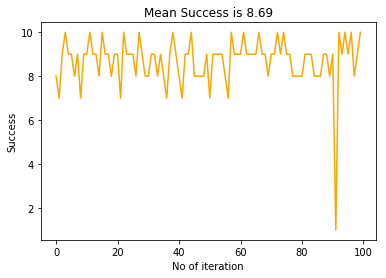

In [10]:
x=list()
for i in range(100):
    x.append(model())
x=np.array(x)
plt.plot(np.arange(100),x[:,0],color='orange')
plt.ylabel('Success')
plt.xlabel('No of iteration')
plt.title('Mean Success is '+str(np.mean(x[:,0])))
plt.savefig('Using_Random_schedule', bbox='tight')
plt.show()